In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import pandas as pd 
from sklearn import datasets,linear_model

In [2]:
data = pd.read_csv('./Folds5x2_pp.csv')
X = data[['AT','V','AP','RH']]
y = data[['PE']]

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [5]:
# 运行Ridge回归
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1) # alpha为正则项系数
ridge.fit(X_train,y_train)

Ridge(alpha=1)

In [6]:
ridge.intercept_,ridge.coef_

(array([447.05552892]),
 array([[-1.97373209, -0.2323016 ,  0.06935852, -0.15806479]]))

In [7]:
# 选择超参数alpha
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas = [0.01,0.1,0.5,1,3,5,7,10,20,100])
ridgecv.fit(X_train,y_train)
ridgecv.alpha_

7.0

In [8]:
# 研究alpha和回归系数θ的关系
# X is a 10x10 matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
# y is a 10 x 1 vector
y = np.ones(10)

n_alphas = 200
# alphas count is 200, 都在10的-10次方和10的-2次方之间
alphas = np.logspace(-10,2,n_alphas)

In [9]:
clf = linear_model.Ridge(fit_intercept=False)
coefs = []

for a in alphas:
    # 设置本次循环的alpha
    clf.set_params(alpha=a)
    
    clf.fit(X,y)
    
    coefs.append(clf.coef_)

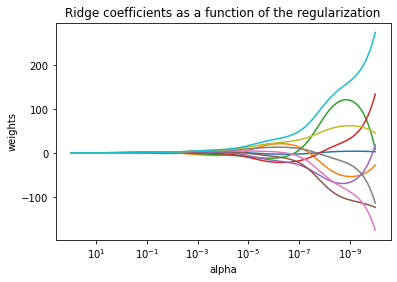

In [10]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
#翻转x轴的大小方向，让alpha从大到小显示
ax.set_xlim(ax.get_xlim()[::-1]) 
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

### 通过图像可以看到，α越大，那么正则项惩罚的就越厉害，得到回归系数θ就越小，最终趋近与0。而如果α越小，即正则化项越小，那么回归系数θ就越来越接近于普通的线性回归系数。